# Estimate a probability with FORM

In this example we estimate a failure probability with the `FORM` algorithm on the cantilever beam example. More precisely, we show how to use the associated results:

- the design point in both physical and standard space,
- the probability estimation according to the FORM approximation, and the following SORM ones: Tvedt, Hohen-Bichler and Breitung,
- the Hasofer reliability index and the generalized ones evaluated from the Breitung, Tvedt and Hohen-Bichler approximations,
- the importance factors defined as the normalized director factors of the design point in the $U$-space
- the sensitivity factors of the Hasofer reliability index and the FORM probability.
- the coordinates of the mean point in the standard event space.

The coordinates of the mean point in the standard event space is:

$$
\frac{1}{E_1(-\beta)}\int_{\beta}^{\infty} u_1 p_1(u_1)du_1
$$

where $E_1$ is the spheric univariate distribution of the standard space and $\beta$ is the reliability index.

## Introduction 

Let us consider the analytical example of a cantilever beam with Young modulus E, length L and section modulus I.

One end of the cantilever beam is built in a wall and we apply a concentrated bending load F at the other end of the beam, resulting in a deviation:

$$
d = \frac{FL^3}{3EI}
$$

Failure occurs when the beam deviation is too large:

$$
d \ge 0.22 (m)
$$

Four independent random variables are considered:

 - E: Young's modulus [Pa]
 - F: load [N]
 - L: length [m]
 - I: section [m^4]

Stochastic model:

 - E ~ Beta(0.9, 3.5, 65e9, 75e9)
 - F ~ LogNormal(mu=300, sigma=30, gamma=0)
 - L ~ Uniform(2.5, 2.6)
 - I ~ Beta(2.5, 4.0, 1.3e-7, 1.7e-7)


In [1]:
from __future__ import print_function
import openturns as ot

Create the marginal distributions of the parameters.

In [2]:
dist_E = ot.Beta(0.9, 3.5, 65e9, 75e9)
dist_F = ot.LogNormalMuSigma(300.0, 30.0, 0.0).getDistribution()
dist_L = ot.Uniform(2.5, 2.6)
dist_I = ot.Beta(2.5, 4.0, 1.3e-7, 1.7e-7)
marginals = [dist_E, dist_F, dist_L, dist_I]

Create the Copula.

In [3]:
RS = ot.CorrelationMatrix(4)
RS[2, 3] = -0.2
# Evaluate the correlation matrix of the Normal copula from RS
R = ot.NormalCopula.GetCorrelationFromSpearmanCorrelation(RS)
# Create the Normal copula parametrized by R
copula = ot.NormalCopula(R) 

Create the joint probability distribution.

In [4]:
distribution = ot.ComposedDistribution(marginals, copula)
distribution.setDescription(['E', 'F', 'L', 'I'])

In [5]:
# create the model
model = ot.SymbolicFunction(['E', 'F', 'L', 'I'], ['F*L^3/(3*E*I)'])

Create the event we want to estimate the probability.

In [6]:
vect = ot.RandomVector(distribution)
G = ot.CompositeRandomVector(model, vect)
event = ot.ThresholdEvent(G, ot.Greater(), 0.22)
event.setName("deviation")

In [7]:
# Define a solver
optimAlgo = ot.Cobyla()
optimAlgo.setMaximumEvaluationNumber(1000)
optimAlgo.setMaximumAbsoluteError(1.0e-5)
optimAlgo.setMaximumRelativeError(1.0e-5)
optimAlgo.setMaximumResidualError(1.0e-5)
optimAlgo.setMaximumConstraintError(1.0e-5)

In [8]:
# Run FORM
algo = ot.FORM(optimAlgo, event, distribution.getMean())
algo.run()
result = algo.getResult()

In [9]:
# Probability
result.getEventProbability()

0.022233845643642235

In [10]:
# Hasofer reliability index
result.getHasoferReliabilityIndex()

2.0096552313368874

Design point in the standard U* space.

In [11]:
result.getStandardSpaceDesignPoint()

class=Point name=Standard Space Design Point dimension=4 values=[-0.350156,1.67671,0.747966,-0.738439]

Design point in the physical X space.

In [12]:
result.getPhysicalSpaceDesignPoint()

class=Point name=Physical Space Design Point dimension=4 values=[6.60323e+10,352.857,2.57728,1.38612e-07]

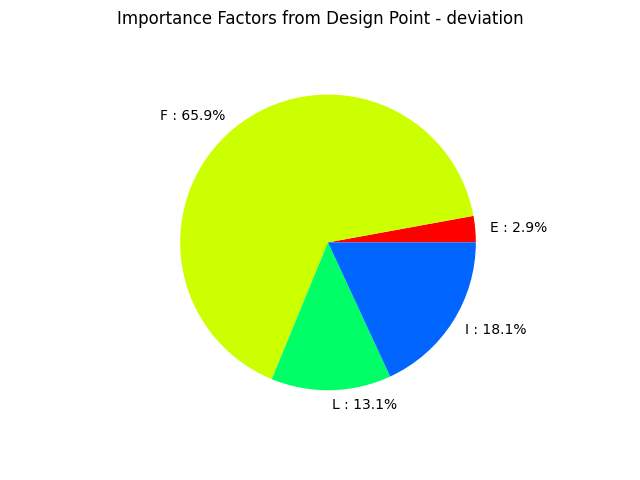

In [13]:
# Importance factors
result.drawImportanceFactors()

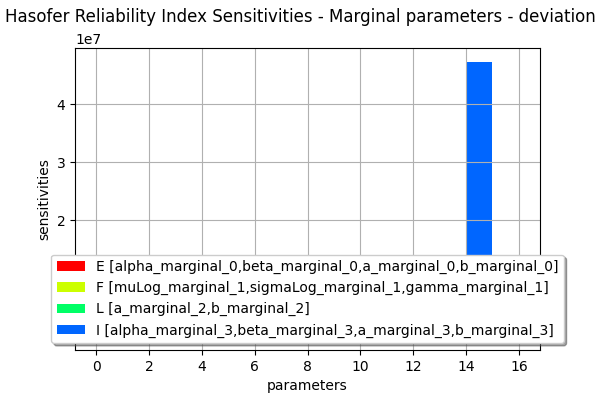

In [14]:
marginalSensitivity, otherSensitivity = result.drawHasoferReliabilityIndexSensitivity()
marginalSensitivity.setLegendPosition('bottom')
marginalSensitivity

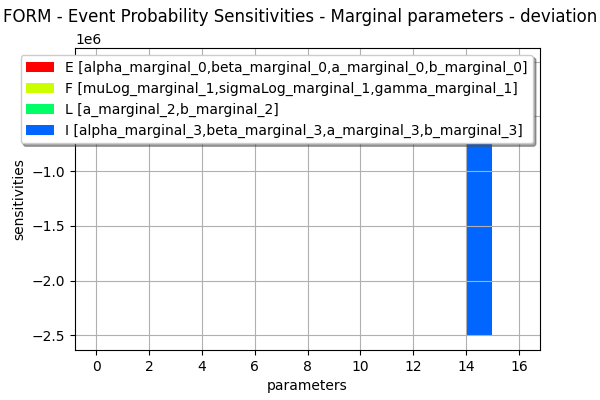

In [15]:
marginalSensitivity, otherSensitivity = result.drawEventProbabilitySensitivity()
marginalSensitivity

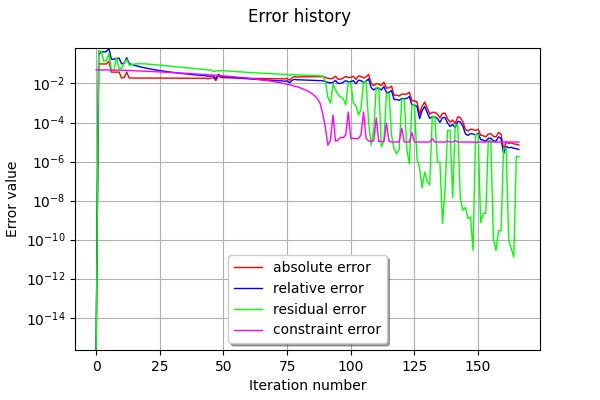

In [16]:
# Error history
optimResult = result.getOptimizationResult()
graphErrors = optimResult.drawErrorHistory()
graphErrors.setLegendPosition('bottom')
graphErrors.setYMargin(0.0)
graphErrors

In [17]:
# Get additional results with SORM
algo = ot.SORM(optimAlgo, event, distribution.getMean())
algo.run()
sorm_result = algo.getResult()

In [18]:
# Reliability index with Breitung approximation
sorm_result.getGeneralisedReliabilityIndexBreitung()

2.166520423208737

In [19]:
# ... with HohenBichler approximation
sorm_result.getGeneralisedReliabilityIndexHohenBichler()

2.190653886192642

In [20]:
# .. with Tvedt approximation
sorm_result.getGeneralisedReliabilityIndexTvedt()

2.1997601013225627

In [21]:
# SORM probability of the event with Breitung approximation
sorm_result.getEventProbabilityBreitung()

0.015135720465873782

In [22]:
# ... with HohenBichler approximation
sorm_result.getEventProbabilityHohenBichler()

0.01423842424615996

In [23]:
# ... with Tvedt approximation
sorm_result.getEventProbabilityTvedt()

0.013911960067491293